# Questão 1 - HMM

Considere o robô da lista anterior, que pode se mover pelos quadrados da figura abaixo.
Para tentar melhorar a previsibilidade de se detectar a posição do robô da Figura 1, sensores são
colocados no ambiente onde o robô circula. Há 4 tipos de sensores (R, B, Y, G), conforme mostrado
na Figura 1. Quando o robô está em qualquer um dos quadrados o respectivo sensor emite um sinal
(para um receptor) com a letra igual ao tipo do sensor. Entretanto, os sensores não são perfeitos,
e podem emitir um sinal errado com probabilidade 0.1. Por exemplo, quando o robô está num dos
quadrados azuis, emite um sinal b com probabilidade 0.9, ou um dos restantes sinais r ou y ou g;
com probabilidade 0.1/3. Como outro exemplo, suponha que o robô esteja na posição inicial conforme
mostrado na Figura 1. Em 3 unidades de tempo, uma possível sequência de sinais recebidos poderiam
ser r g b, se o robô for para norte e depois para leste. Entretanto, mesmo com o mesmo movimento,
os sinais recebidos poderiam ser também r g g ou b b b, etc.

Seu objetivo é determinar a posição do robô, a partir dos sinais recebidos dos sensores.

Segue a ilustração da cadeia de Markov para o problema.

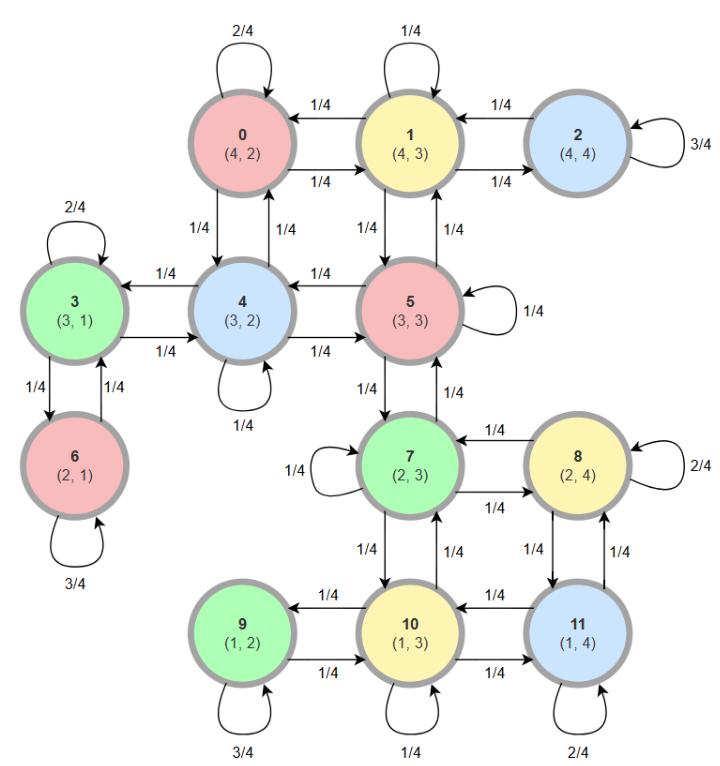

## Item 1: Explique como você fará uma HMM que possa permitir prever a posição do robô a partir dos sinais recebidos.

Para criar o HMM desse problema, precisamos de:

1. Número de estados, $N$, da cadeia de Markov *(Markov Chain - MC)*. Nesse caso, $N = 12$ e denotaremos cada estado como $s_0, s_1, ..., s_{11}$ de acordo com o número correspondente a ele na ilustração da cadeia.
2. O estado (oculto) no tempo $t$ é denotado por $q_t$. Então, a sequência de estados até o tempo $T$ é $q_1, q_2,  \ldots, q_T$.
3.  O número $M$, de observações distintas. Os valores observados são denotados por $v_k$ para $1 \leq j \leq M .(M=4$ nesse caso e $v_1 = R, v_2 = B, v_3 = Y, v_4 = G)$
4. O valor observado no tempo $j$ é denotado $O_j$. Então, a sequência de observações até o tempo $T$ é $O_1, O_2, \ldots O_T$. Uma notação abreviada para a sequência de observações até o tempo $T$ é $\mathcal{O}_T$. Nesse caso, a observação será diferente para cada questão.
5. Matriz de transição $\mathbf{P}=\left[p_{i, j}\right]$, onde $p_{i, j}=P\left[q_{t+1}=s_j \mid q_t=\right.$ $\left.s_i\right]$ para qualquer tempo $t$ e $0 \leq i,j \leq 11$ para ficar parecido com a implementação. Nesse problema a matriz será dada por:

$$
\mathbf{P} = 
\frac{1}{4}
 \begin{bmatrix}
 2 & 1 & \cdot & \cdot & 1 & \cdot & \cdot & \cdot & \cdot & \cdot & \cdot & \cdot \\
 1 & 1 & 1 & \cdot & \cdot & 1 & \cdot & \cdot & \cdot & \cdot & \cdot & \cdot \\
 \cdot & 1 & 3 & \cdot & \cdot & \cdot & \cdot & \cdot & \cdot & \cdot & \cdot & \cdot \\
 \cdot & \cdot & \cdot & 2 & 1 & \cdot & 1 & \cdot & \cdot & \cdot & \cdot & \cdot \\
 1 & \cdot & \cdot & 1 & 1 & 1 & \cdot & \cdot & \cdot & \cdot & \cdot & \cdot \\
 \cdot & 1 & \cdot & \cdot & 1 & 1 & \cdot & 1 & \cdot & \cdot & \cdot & \cdot \\
 \cdot & \cdot & \cdot & 1 & \cdot & \cdot & 3 & \cdot & \cdot & \cdot & \cdot & \cdot \\
 \cdot & \cdot & \cdot & \cdot & \cdot & 1 & \cdot & 1 & 1 & \cdot & 1 & \cdot \\
 \cdot & \cdot & \cdot & \cdot & \cdot & \cdot & \cdot & 1 & 2 & \cdot & \cdot & 1 \\
 \cdot & \cdot & \cdot & \cdot & \cdot & \cdot & \cdot & \cdot & \cdot & 3 & 1 & \cdot \\
 \cdot & \cdot & \cdot & \cdot & \cdot & \cdot & \cdot & 1 & \cdot & 1 & 1 & 1 \\
 \cdot & \cdot & \cdot & \cdot & \cdot & \cdot & \cdot & \cdot & 1 & \cdot & 1 & 2 
\end{bmatrix}  
$$
       
6. A distribuição condicional para o valor observado $v_k$ condicionado ao estado do MC subjacente: $b_j(k)=P\left[O_t=v_k \mid q_t=s_j\right] . \mathcal{B}=\left\{b_j(k)\right\}$ denota o conjunto de todas essas distribuições de probabilidade condicional. Vou representar $\mathcal{B}$ como uma tabela:

| $b_j(k)$ \ Estado $s_j$       |   $s_0$  |   $s_1$  |   $s_2$   |   $s_3$   |   $s_4$   |   $s_5$   |   $s_6$   |   $s_7$   |   $s_8$   |   $s_9$   |   $s_{10}$  |   $s_{11}$  |
|-----------------|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|
| $b_j(1) = P[O_t = R \mid q_t = s_j]$ |   **0.9** | 0.1/3 | 0.1/3 | 0.1/3 | 0.1/3 |   **0.9** |   **0.9** | 0.1/3 | 0.1/3 | 0.1/3 | 0.1/3 | 0.1/3 |
| $b_j(2) = P[O_t = B \mid q_t = s_j]$ | 0.1/3 | 0.1/3 |   **0.9** | 0.1/3 |   **0.9** | 0.1/3 | 0.1/3 | 0.1/3 | 0.1/3 | 0.1/3 | 0.1/3 |   **0.9** |
| $b_j(3) = P[O_t = Y \mid q_t = s_j]$ | 0.1/3 |   **0.9** | 0.1/3 | 0.1/3 | 0.1/3 | 0.1/3 | 0.1/3 | 0.1/3 |   **0.9** | 0.1/3 |   **0.9** | 0.1/3 |
| $b_j(4) = P[O_t = G \mid q_t = s_j]$ | 0.1/3 | 0.1/3 | 0.1/3 |   **0.9** | 0.1/3 | 0.1/3 | 0.1/3 |   **0.9** | 0.1/3 |   **0.9** | 0.1/3 | 0.1/3 |

7. $\boldsymbol{\pi}^{(1)}$ denota o vetor de probabilidade inicial, i.e., $\boldsymbol{\pi}^{(1)}=$ $\left[\pi_1^{(1)}, \pi_2^{(1)}, \ldots, \pi_N^{(1)}\right]$ onde $\pi_i^{(1)}=P\left[q_1=s_i\right]$.
8. Então o modelo $\mathcal{M}$ será definido por $\mathcal{M}=(\mathbf{P}, \mathcal{B}, \mathbf{p})$.

## Item 2: Suponha que o receptor de sinais tenha recebido a sequência *r r y r y r b g b r y y g b*. Qual a probabilidade desta sequência ocorrer? Explique e implemente o algoritmo necessário para responder a pergunta.

Denotemos essa primeira sequência para a questão como $O^1=r,y,r,y,r,b,g,b,r,y,y,g,b$, e uma sequência de estados qualquer até o tempo $T$ como $Q = q_1, ..., q_T$.

Queremos encontrar a probabilidade $P[O^1 \mid \mathcal{M}]$, que será dada pela soma das probabilidades de cada caminho $Q$ possível gerar essa observação, i.e, a probabilidade conjunta de $O^1$ e $Q$.  Então queremos a probabilidade:

$$P[O^1 \mid \mathcal{M}] = \sum_{Q} P[O^1, Q | \mathcal{M}]$$

A princípio, poderíamos fazer essa conta calculando a probabilidade de cada caminho gerar a sequência, mas é impossível de fazer em tempo hábil. Então, descreveremos um algoritmo que usa a técnica de programação dinâmica para reduzir a quantidade e cálculos para resolver o problema para uma sequência qualquer $O = O_1, ..., O_T$.

Primeiramente, definamos a função que nos dá a probabilidade de observar parte da sequência até um tempo $t$ e estar no estado $s_i$:

$$\alpha_{t}(i) = P[O_1, ..., O_t, q_t=s_i | \mathcal{M}]$$

Então definamos a recursão:

- Caso base: a probabilidade de um estado inicial qualquer gerar a primeira observação

$$\alpha_1(i) = \pi_i \cdot b_i(O_1)$$

- Passo indutivo:

$$\alpha_{t+1}(j) = \left[ \sum_{i=1}^N \alpha_{t}(i) \cdot p_{i,j} \right] \cdot b_j(O_{t+1})$$

Dessa forma queremos calcular:

$$P[O \mid \mathcal{M}] = \sum_{i=1}^{N} \alpha_{T}(i)$$

Ou seja, a soma das probabilidades de todos estados chegar ao tempo final $T$ com a sequência $O$ observada.

Essa recursão nos permite guardar os valores calculados para $\alpha$ e evitar recalculá-los sem necessidade, diminuindo a complexidade do problema.

Portanto, iremos primeiro calcular $\alpha_{T}(i)$ para todos os estados $i$, então somá-los, resultando em $P[O \mid \mathcal{M}]$.


#### Implementação
Vejamos a implementação abaixo

In [3]:
import numpy as np

def forward_algorithm(O, S, pi, P, B):
    N = len(S)
    T = len(O)

    # Inicialização da matriz alpha
    alpha = np.zeros((T, N))

    # Caso base: inicializar alpha_1(i) = pi_i * b_i(O_1)
    for i in range(N):
        alpha[0, i] = pi[i] * B[i][O[0]]

    # Passo indutivo: calcular alpha_t+1(j)
    for t in range(1, T):
        for j in range(N):
            alpha[t, j] = np.sum(alpha[t - 1, :] * P[:, j]) * B[j][O[t]]

    # Somar as probabilidades finais: P[O | M] = sum(alpha_T(i))
    P_O_given_M = np.sum(alpha[-1, :])

    return P_O_given_M

#### Resultados

Para o problema atual, teremos o seguinte resultado

In [4]:
S = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11] # estados
pi = np.ones(12) / 12  # pi_i

P = np.array([
    [2, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
    [1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0],
    [0, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 2, 1, 0, 1, 0, 0, 0, 0, 0],
    [1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0],
    [0, 0, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 1],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1],
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 2]
]) / 4 # Matriz de transição

B_legivel = [
    {'r': 0.9 , 'b': .1/3, 'y': .1/3, 'g': .1/3,}, #s0
    {'r': .1/3, 'b': .1/3, 'y': 0.9 , 'g': .1/3,}, #s1 
    {'r': .1/3, 'b': 0.9 , 'y': .1/3, 'g': .1/3,}, #s2
    {'r': .1/3, 'b': .1/3, 'y': .1/3, 'g': 0.9 ,}, #s3
    {'r': .1/3, 'b': 0.9 , 'y': .1/3, 'g': .1/3,}, #s4
    {'r': 0.9 , 'b': .1/3, 'y': .1/3, 'g': .1/3,}, #s5
    {'r': 0.9 , 'b': .1/3, 'y': .1/3, 'g': .1/3,}, #s6
    {'r': .1/3, 'b': .1/3, 'y': .1/3, 'g': 0.9 ,}, #s7
    {'r': .1/3, 'b': .1/3, 'y': 0.9 , 'g': .1/3,}, #s8
    {'r': .1/3, 'b': .1/3, 'y': .1/3, 'g': 0.9 ,}, #s9
    {'r': .1/3, 'b': .1/3, 'y': 0.9 , 'g': .1/3,}, #s10
    {'r': .1/3, 'b': 0.9 , 'y': .1/3, 'g': .1/3,}, #s11
] 

B = np.array([
    list(b.values()) for b in B_legivel 
]) # traduzido pro numpy facilitar as contas

O1_legivel = ['r', 'r', 'y', 'r', 'y', 'r', 'b', 'g', 'b', 'r', 'y', 'y', 'g', 'b']

def traducao(sequencia):
    dicionario = {'r': 0, 'b': 1, 'y': 2, 'g': 3}
    return list(map(lambda x: dicionario[x], sequencia))

O1 = traducao(O1_legivel)

# Calculando a probabilidade P[O | M]
probability_O1 = forward_algorithm(O1, S, pi, P, B)
probability_O1

3.231885385467719e-09

Fiquei curioso com o número pequeno e a possibilidade de ter underflow, então implementei a versão do Murphy que faz normalizações a cada passo para evitar que os números fiquem muito pequenos e trabalha com o log das probabilidades.

In [5]:
def forward_algorithm_murphy(O, S, pi, P, B):
    N = len(S)  # Número de estados
    T = len(O)  # Comprimento da sequência de observações

    # Inicialização de alpha e log probabilidade
    alpha = np.zeros((T, N))
    log_evidence = 0

    # Inicializar alpha_1 usando as distribuições iniciais
    alpha[0, :] = pi * B[:, O[0]]
    Z_1 = np.sum(alpha[0, :])  # Normalizador
    alpha[0, :] /= Z_1  # Normalizar
    log_evidence += np.log(Z_1)

    # Loop para calcular alpha_t para t = 2, ..., T
    for t in range(1, T):
        # Predição: calcular alpha_t^pred usando transição
        alpha_pred = np.dot(alpha[t - 1, :], P)

        # Atualização: incorporar evidência local
        alpha[t, :] = alpha_pred * B[:, O[t]]

        # Normalização
        Z_t = np.sum(alpha[t, :])  # Normalizador
        alpha[t, :] /= Z_t  # Normalizar
        log_evidence += np.log(Z_t)

    return log_evidence

Para as mesmas entradas anteriores

In [6]:
forward_algorithm_murphy(O1, S, pi, P, B)

-19.550200159333535

In [7]:
np.log(probability_O1)

-19.550200159333535

As duas implementações deram o mesmo resultado!!

## Item 3: Repita o item anterior para a sequência *r b y r g r b g b r y y g b*.


In [8]:
O2 = ['r', 'b', 'y', 'r', 'g', 'r', 'b', 'g', 'b', 'r', 'y', 'y', 'g', 'b']

# Calculando a probabilidade P[O | M]
log_probability_O2 = forward_algorithm_murphy(traducao(O2), S, pi, P, B)
probability_O2 = np.exp(log_probability_O2)
log_probability_O2, probability_O2

(-22.456796877035273, 1.7665951552409145e-10)

## Item 4: Para a primeira sequência acima, qual o quadrado mais provável onde estará o robô na última posição (isto é, o quadrado de onde foi emitido o último sinal)? Explique e implemente o algoritmo necessário.


Para isso, podemos usar os valores de $\alpha_T(i)$ calculados anteriormente. Queremos o estado com maior probabilidade de se estar após observar toda a sequência. Isso será dado por:

$$\underset{i}{argmax} \left\{ \alpha_T(i) \right\}$$

Adaptando a função para retornar o alpha em vez da probabilidade da sequência, obtemos que o estado mais provável de ser o último para a primeira sequência é o **estado 2**.

In [9]:
def forward_algorithm_murphy_alpha(O, S, pi, P, B):
    N = len(S)  # Número de estados
    T = len(O)  # Comprimento da sequência de observações

    # Inicialização de alpha e log probabilidade
    alpha = np.zeros((T, N))
    log_evidence = 0

    # Inicializar alpha_1 usando as distribuições iniciais
    alpha[0, :] = pi * B[:, O[0]]
    Z_1 = np.sum(alpha[0, :])  # Normalizador
    alpha[0, :] /= Z_1  # Normalizar
    log_evidence += np.log(Z_1)

    # Loop para calcular alpha_t para t = 2, ..., T
    for t in range(1, T):
        # Predição: calcular alpha_t^pred usando transição
        alpha_pred = np.dot(alpha[t - 1, :], P)

        # Atualização: incorporar evidência local
        alpha[t, :] = alpha_pred * B[:, O[t]]

        # Normalização
        Z_t = np.sum(alpha[t, :])  # Normalizador
        alpha[t, :] /= Z_t  # Normalizar
        log_evidence += np.log(Z_t)

    return alpha

In [10]:
alpha1 = forward_algorithm_murphy_alpha(O1, S, pi, P, B)
most_probable_last_state = np.argmax(alpha1[-1,:])
most_probable_last_state

2

## Item 5: Para a segunda sequência acima, qual o quadrado mais provável onde estará o robô? 



Queremos o estado que tenha maior probabilidade de ser visitado num instante de tempo qualquer para uma dada sequência. Ou seja

$$\arg\max_{i}  P(q_t = s_i \mid O, \mathcal{M}) $$

Para calcular essa probabilidade vamos definir a probabilidade de observar a sequência a partir de $t+1$ até o final, partindo do estado $s_i$:

$$
\beta_{t}(i) = P(O_{t+1}, ..., O_T \mid q_t=s_i, \mathcal{M})
$$

Definamos:

$$
\gamma_{t}(i) = P(q_t = s_i \mid O, \mathcal{M})
$$

Podemos calculá-lo usando o teorema de Bayes:

$$
\gamma_{t}(i) = P(q_t = s_i \mid O, \mathcal{M}) = \frac{P(O | q_t = s_i, \mathcal{M}) \cdot P(q_t = s_i, \mathcal{M})}{P(O | \mathcal{M})}
$$

Podemos separar a likelihood da observação como:

$$
P(O | q_t = s_i, \mathcal{M}) = P(O_{1}, ..., O_t \mid q_t=s_i, \mathcal{M}) \cdot P(O_{t+1}, ..., O_T \mid q_t=s_i, \mathcal{M})
$$

Mas temos que o segundo fator é o próprio beta, e podemos escrever alpha como:
$$
\alpha_t(i) =  P(O_{1}, ..., O_t, q_t=s_i, \mathcal{M}) =  P(O_{1}, ..., O_t \mid q_t=s_i, \mathcal{M})  \cdot  P(q_t = s_i, \mathcal{M})
$$

Logo, substituindo as probabilidades, temos:

$$
\gamma_{t}(i) = \frac{\alpha_t(i) \cdot \beta_t{i}}{P(O | \mathcal{M})}
$$

Onde,

$$P(O | \mathcal{M}) = \sum_{j=1}^N \alpha_t(j) \cdot \beta_t{j}$$

Dessa forma, como já temos o alpha, basta calcular o beta:
- Caso base:
$$ \beta_T{i} = 1$$

- Passo indutivo:
$$ \beta_t(i) = \sum_{j=1}^N p_{i,j} \cdot b_j(O_{t+1}) \cdot \beta_{t+1}(j)$$


Ao final, podemos somar as probabilidades de um estado em cada instante de tempo, obtendo uma probabilidade não normalizada, então ver qual estado tem maior probabilidade:

$$
q^* = \arg\max_{i}\left\{ \sum_t \gamma_{t}(i) \right\}
$$

A partir da implementação abaixo, obtemos que **o estado com maior probabilidade é o 4.**

#### Implementação do backwards

In [11]:
def backward_algorithm_murphy_beta(O, S, pi, P, B):
    N = len(S)  # Número de estados
    T = len(O)  # Comprimento da sequência de observações

    # Inicialização de alpha e log probabilidade
    beta = np.zeros((T, N))
    log_evidence = 0

    # Inicializar alpha_1 usando as distribuições iniciais
    beta[T-1, :] = 1
    Z_1 = np.sum(beta[T-1, :])  # Normalizador
    beta[T-1, :] /= Z_1  # Normalizar
    log_evidence += np.log(Z_1)

    # Loop para calcular alpha_t para t = T-1, ..., 1
    for t in range(T-1, 0, -1):
        # Predição: calcular alpha_t^pred usando transição
        beta_pred = np.dot(beta[t, :], P)

        # Atualização: incorporar evidência local
        beta[t-1, :] = beta_pred * B[:, O[t]]

        # Normalização
        Z_t = np.sum(beta[t-1, :])  # Normalizador
        beta[t-1, :] /= Z_t  # Normalizar
        log_evidence += np.log(Z_t)

    return beta

In [12]:
def gamma(O, S, pi, P, B):
    alpha = forward_algorithm_murphy_alpha(O, S, pi, P, B)
    beta = backward_algorithm_murphy_beta(O, S, pi, P, B)

    N = len(S)
    T = len(O)
    
    gamma = np.zeros((T, N))
    
    for t in range(T):
        for i in range(N):
            gamma[t, i] = alpha[t,i] * beta[t,i] / sum([alpha[t,j] * beta[t,j] for j in range(N)])

    return gamma

In [14]:
gamma2 = gamma(traducao(O2), S, pi, P, B)

q_star = np.argmax(np.sum(gamma2, axis=0))
q_star

4

## Item 6: Para a primeira sequência acima, qual o caminho mais provável percorrido pelo robô? Explique o algoritmo usado, mas não precisa implementar. Use uma biblioteca de Python ou outra linguagem preferida.

Para isso, utilizamos o algoritmo de Viterbi, que fornecerá o caminho mais provável, dada uma sequência.

Primeiramente, definimos uma função que nos dá a probabilidade máxima de observar parte da sequência $O_1, ..., O_t$, terminando no estado $s_i$:

$$
\delta_t(i) = \max_{q_1, ..., q_{t-1}} P[q_1, ..., q_{t-1}, q_t = s_i, O_1, ..., O_t \mid \mathcal{M}]
$$

E uma função que guarda a sequência de estados:



Então definimos a recursão:

- Caso base: a probabilidade de começar no estado inicial $s_i$ e gerar a primeira observação:

$$
\delta_1(i) = \pi_i \cdot b_i(O_1)
$$
$$
\psi_1(i) = 0
$$

- Passo indutivo: a probabilidade máxima de observar a sequência $O_1, ..., O_t$ terminando no estado $ s_j $ é dada pelo máximo dos caminhos provenientes dos estados anteriores:

$$
\delta_{t+1}(j) = \max_{i} \left[\delta_t(i) \cdot p_{i,j}\right] \cdot b_j(O_{t+1})
$$

$$
\psi_{t+1}(i) = \arg\max_{i} \delta_{t}(i) \cdot p_{i,j} 
$$

- Terminação

$$q_T^* = \arg\max_{i} \delta_{T}(i) $$

A sequência de caminhos será obtida através de psi:

$$q_{t}^* = \psi_{t+1}( q_{t+1}^*)$$ 

In [15]:
def viterbi_algorithm(O, S, pi, P, B):
    N = len(S)  # Número de estados
    T = len(O)  # Comprimento da sequência de observações

    # Inicialização das variáveis
    delta = np.zeros((T, N))  # Probabilidade máxima até o tempo t para cada estado
    psi = np.zeros((T, N), dtype=int)  # Armazena os estados anteriores para reconstrução do caminho

    # Inicialização do passo base
    delta[0, :] = pi * B[:, O[0]]

    # Loop para calcular delta_t para t = 2, ..., T
    for t in range(1, T):
        for j in range(N):
            # Calcular a probabilidade máxima e o estado correspondente
            probabilities = delta[t - 1, :] * P[:, j]
            delta[t, j] = np.max(probabilities) * B[j, O[t]]
            psi[t, j] = np.argmax(probabilities)

    q_T_star = np.argmax(delta[-1,:])
    best_sequence = [q_T_star]
    for t in range(T-1, 0, -1):
        last_best_q_t = best_sequence[0]
        q_t_star = psi[t, last_best_q_t]
        best_sequence = [q_t_star] + best_sequence
    
    return best_sequence

In [16]:
viterbi_algorithm(O1, S, pi, P, B)

[0, 0, 1, 0, 1, 0, 4, 3, 4, 0, 1, 1, 2, 2]